In [2]:
import pandas as pd

# Đọc trade data
trade = pd.read_csv("trade_vn.csv")

# Đổi tên cho dễ
trade = trade.rename(columns={
    "Export in 1000 USD ": "Export",
    "Import in 1000 USD ": "Import"
})

# Xử lý missing
trade["Export"] = trade["Export"].fillna(0)
trade["Import"] = trade["Import"].fillna(0)

# Gộp theo năm
trade_year = trade.groupby("Year").agg({
    "Export": "sum",
    "Import": "sum"
}).reset_index()

# Tạo biến cán cân thương mại
trade_year["TradeBalance"] = trade_year["Export"] - trade_year["Import"]

print(trade_year.head())


   Year        Export        Import  TradeBalance
0  2000  2.896549e+07  3.127306e+07 -2.307570e+06
1  2001  3.005838e+07  3.243586e+07 -2.377476e+06
2  2002  3.341211e+07  3.949111e+07 -6.079002e+06
3  2003  4.029865e+07  5.051156e+07 -1.021291e+07
4  2004  5.297007e+07  6.393764e+07 -1.096757e+07


In [3]:
trade_year["Export"] *= 1000
trade_year["Import"] *= 1000
trade_year["TradeBalance"] *= 1000


In [4]:
macro = pd.read_csv("macro_vn.csv")

# Đổi tên cột năm cho đồng nhất
macro = macro.rename(columns={"Time": "Year"})

# Merge
df = pd.merge(
    macro,
    trade_year,
    on="Year",
    how="inner"   # chỉ lấy năm có đủ dữ liệu
)

print(df.head())


   Year Time Code Country Name Country Code  \
0  2000    YR2000     Viet Nam          VNM   
1  2001    YR2001     Viet Nam          VNM   
2  2002    YR2002     Viet Nam          VNM   
3  2003    YR2003     Viet Nam          VNM   
4  2004    YR2004     Viet Nam          VNM   

   GDP (current US$) [NY.GDP.MKTP.CD]  \
0                        3.117252e+10   
1                        3.268520e+10   
2                        3.506411e+10   
3                        3.955251e+10   
4                        4.542785e+10   

   GDP per capita (current US$) [NY.GDP.PCAP.CD]  \
0                                     404.029784   
1                                     419.205678   
2                                     445.132862   
3                                     497.117089   
4                                     565.452285   

   Population, total [SP.POP.TOTL]  \
0                         77154011   
1                         77969361   
2                         78772224   
3    

In [5]:
print(df.isna().sum())


Year                                                                         0
Time Code                                                                    0
Country Name                                                                 0
Country Code                                                                 0
GDP (current US$) [NY.GDP.MKTP.CD]                                           0
GDP per capita (current US$) [NY.GDP.PCAP.CD]                                0
Population, total [SP.POP.TOTL]                                              0
Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]     0
Foreign direct investment, net outflows (% of GDP) [BM.KLT.DINV.WD.GD.ZS]    0
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                       0
Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]           0
Export                                                                       0
Import                                              

===== DANH SÁCH CỘT TRONG DATASET =====
Year
Time Code
Country Name
Country Code
GDP (current US$) [NY.GDP.MKTP.CD]
GDP per capita (current US$) [NY.GDP.PCAP.CD]
Population, total [SP.POP.TOTL]
Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]
Foreign direct investment, net outflows (% of GDP) [BM.KLT.DINV.WD.GD.ZS]
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]
Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]
Export
Import
TradeBalance

===== DỮ LIỆU TRƯỚC KHI TIỀN XỬ LÝ =====


,Year,Time Code,Country Name,Country Code,GDP,GDP_per_capita,Population,FDI,FDI_out,Inflation,ExchangeRate,Export,Import,TradeBalance
0,2000,YR2000,Viet Nam,VNM,3.117252e+10,404.029784,77154011,4.163924,0.0,-1.710337279,14167.75000,2.896549e+10,3.127306e+10,-2.307570e+09
1,2001,YR2001,Viet Nam,VNM,3.268520e+10,419.205678,77969361,3.977335,0.0,-0.431544512,14725.16667,3.005838e+10,3.243586e+10,-2.377476e+09
2,2002,YR2002,Viet Nam,VNM,3.506411e+10,445.132862,78772224,3.992687,0.0,3.830828382,15279.50000,3.341211e+10,3.949111e+10,-6.079002e+09
3,2003,YR2003,Viet Nam,VNM,3.955251e+10,497.117089,79563777,3.666012,0.0,3.234648173,15509.58333,4.029865e+10,5.051156e+10,-1.021291e+10
4,2004,YR2004,Viet Nam,VNM,4.542785e+10,565.452285,80338971,3.544081,0.0,7.754947487,15746.00000,5.297007e+10,6.393764e+10,-1.096757e+10



KÍCH THƯỚC DỮ LIỆU: (24, 14)

GIÁ TRỊ THIẾU:


Year              0
Time Code         0
Country Name      0
Country Code      0
GDP               0
GDP_per_capita    0
Population        0
FDI               0
FDI_out           0
Inflation         0
ExchangeRate      0
Export            0
Import            0
TradeBalance      0
dtype: int64


===== THỐNG KÊ MÔ TẢ =====


,Year,GDP,GDP_per_capita,Population,FDI,FDI_out,ExchangeRate,Export,Import,TradeBalance
count,24.000000,2.400000e+01,24.000000,2.400000e+01,24.000000,24.000000,24.000000,2.400000e+01,2.400000e+01,2.400000e+01
mean,2011.500000,1.889828e+11,2022.142516,8.885287e+07,4.835378,0.269502,19327.805733,2.752197e+11,2.758099e+11,-5.902345e+08
std,7.071068,1.316293e+11,1293.723418,7.584106e+06,1.547694,0.296290,3367.936615,2.338987e+11,2.174533e+11,2.125267e+10
min,2000.000000,3.117252e+10,404.029784,7.715401e+07,3.390404,-0.357260,14167.750000,2.896549e+10,3.127306e+10,-3.605740e+10
25%,2005.750000,6.418706e+10,783.504174,8.189800e+07,3.988849,0.065284,15960.416667,7.596290e+10,8.571723e+10,-1.040157e+10
50%,2011.500000,1.840930e+11,2068.021360,8.898934e+07,4.291599,0.181720,20668.875000,2.114348e+11,2.205303e+11,-2.342523e+09
75%,2017.250000,2.885420e+11,3022.659949,9.544206e+07,4.948502,0.507061,22428.077503,4.445273e+11,4.382574e+11,6.087305e+09
max,2023.000000,4.338580e+11,4323.350320,1.003522e+08,9.663039,0.915264,23787.319170,7.418183e+11,7.175766e+11,5.526765e+10



===== DỮ LIỆU SAU TIỀN XỬ LÝ =====


,Year,Time Code,Country Name,Country Code,GDP,GDP_per_capita,Population,FDI,FDI_out,Inflation,ExchangeRate,Export,Import,TradeBalance
0,2000,YR2000,Viet Nam,VNM,3.117252e+10,404.029784,77154011,4.163924,0.0,-1.710337279,14167.75000,2.896549e+10,3.127306e+10,-2.307570e+09
1,2001,YR2001,Viet Nam,VNM,3.268520e+10,419.205678,77969361,3.977335,0.0,-0.431544512,14725.16667,3.005838e+10,3.243586e+10,-2.377476e+09
2,2002,YR2002,Viet Nam,VNM,3.506411e+10,445.132862,78772224,3.992687,0.0,3.830828382,15279.50000,3.341211e+10,3.949111e+10,-6.079002e+09
3,2003,YR2003,Viet Nam,VNM,3.955251e+10,497.117089,79563777,3.666012,0.0,3.234648173,15509.58333,4.029865e+10,5.051156e+10,-1.021291e+10
4,2004,YR2004,Viet Nam,VNM,4.542785e+10,565.452285,80338971,3.544081,0.0,7.754947487,15746.00000,5.297007e+10,6.393764e+10,-1.096757e+10


✅ Đã xuất file dữ liệu: macro_vietnam_processed.csv
df_processed columns: ['Year', 'Time Code', 'Country Name', 'Country Code', 'GDP', 'GDP_per_capita', 'Population', 'FDI', 'FDI_out', 'Inflation', 'ExchangeRate', 'Export', 'Import', 'TradeBalance']

CÁC BIẾN ĐƯỢC DÙNG TRONG MA TRẬN TƯƠNG QUAN:
['GDP', 'GDP_per_capita', 'Population', 'Export', 'Import', 'TradeBalance', 'FDI', 'Inflation', 'ExchangeRate']


,GDP,GDP_per_capita,Population,Export,Import,TradeBalance,FDI,Inflation,ExchangeRate
GDP,1.000000,0.998849,0.985421,0.985296,0.984634,0.769192,-0.088436,-0.237109,0.966095
GDP_per_capita,0.998849,1.000000,0.990078,0.977007,0.977666,0.749270,-0.078693,-0.216199,0.975536
Population,0.985421,0.990078,1.000000,0.956298,0.962571,0.675793,0.005962,-0.156948,0.978560
Export,0.985296,0.977007,0.956298,1.000000,0.998218,0.792031,-0.100539,-0.282842,0.917733
Import,0.984634,0.977666,0.962571,0.998218,1.000000,0.754195,-0.062763,-0.250989,0.920600
TradeBalance,0.769192,0.749270,0.675793,0.792031,0.754195,1.000000,-0.464308,-0.544778,0.680818
FDI,-0.088436,-0.078693,0.005962,-0.100539,-0.062763,-0.464308,1.000000,0.511511,-0.118069
Inflation,-0.237109,-0.216199,-0.156948,-0.282842,-0.250989,-0.544778,0.511511,1.000000,-0.175587
ExchangeRate,0.966095,0.975536,0.978560,0.917733,0.920600,0.680818,-0.118069,-0.175587,1.000000


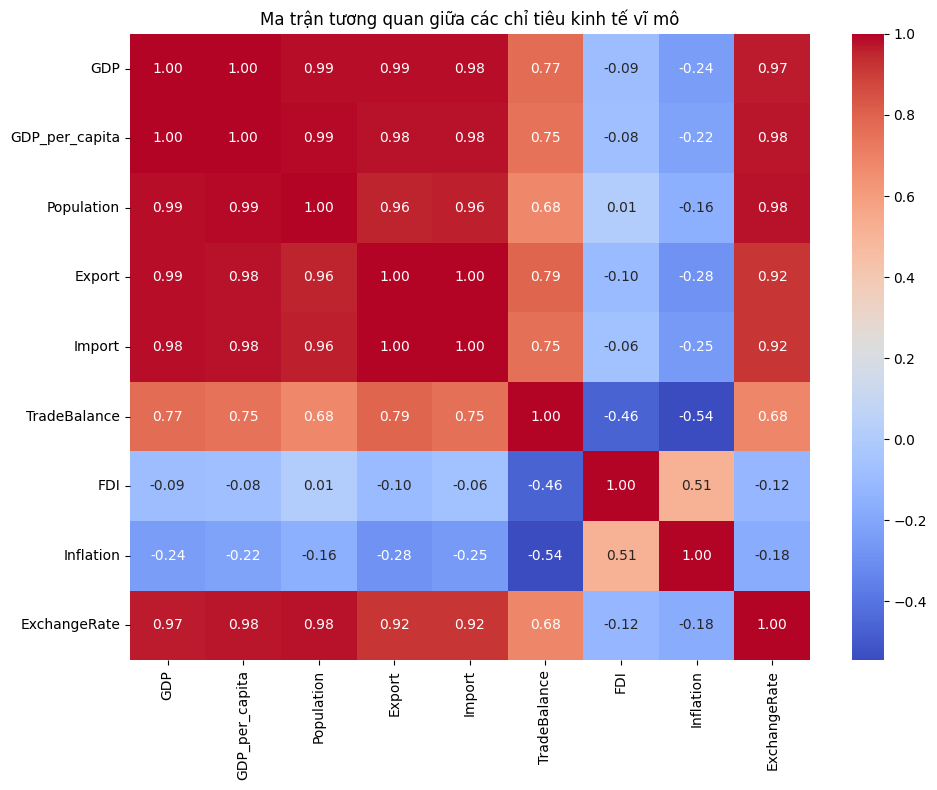

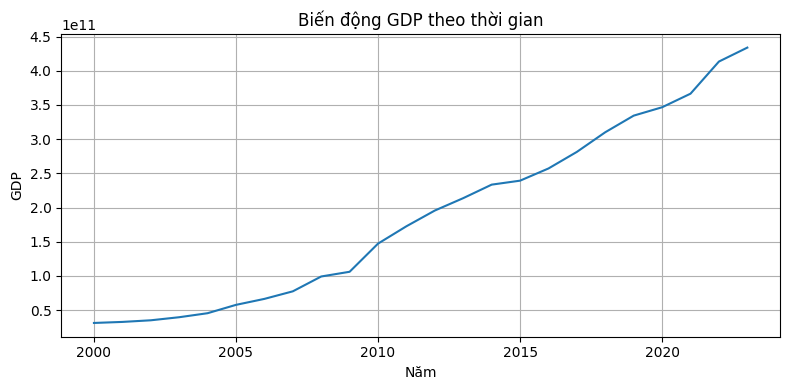

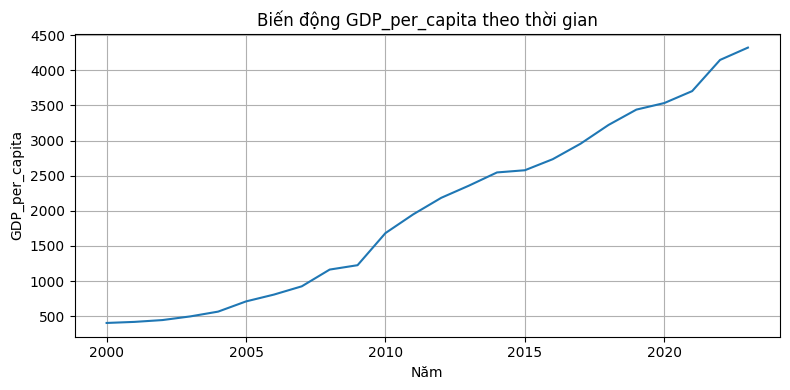

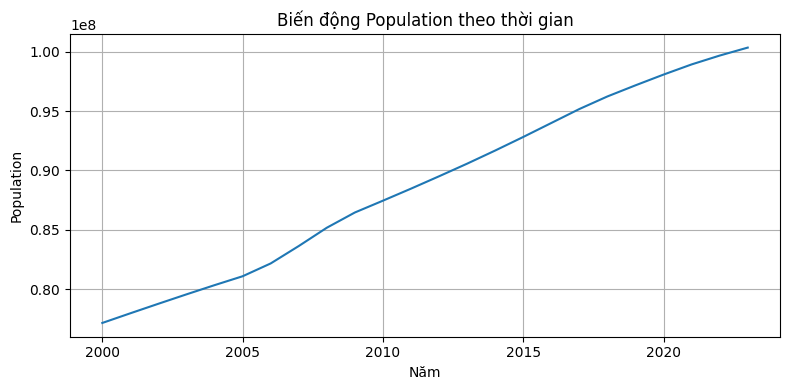

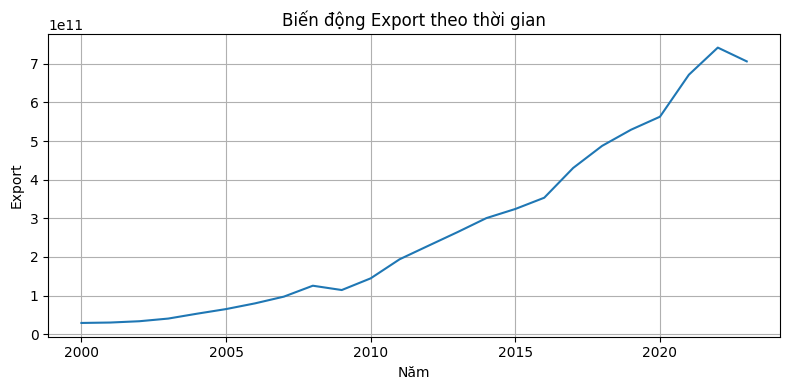

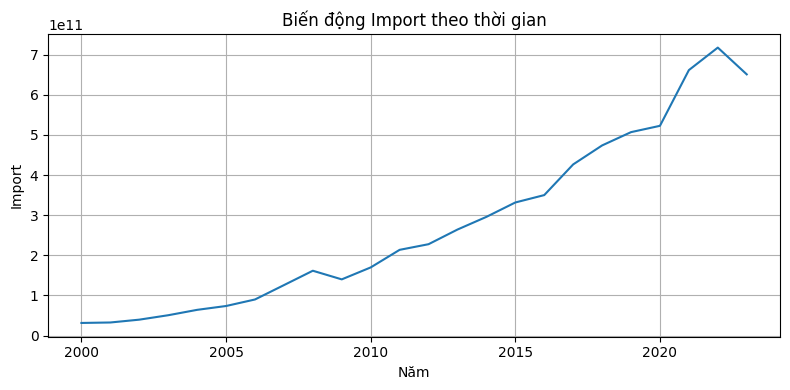

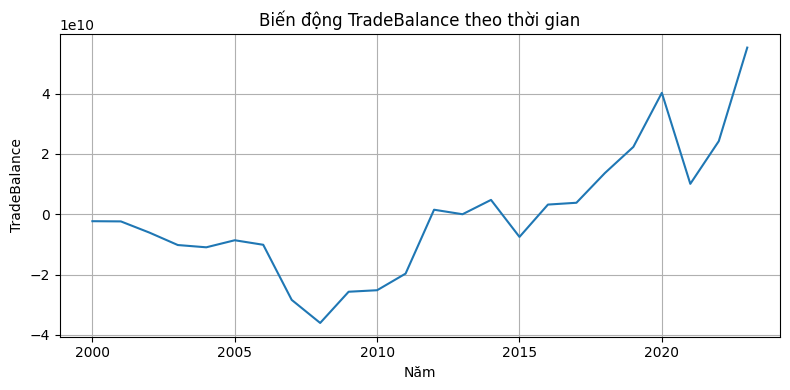

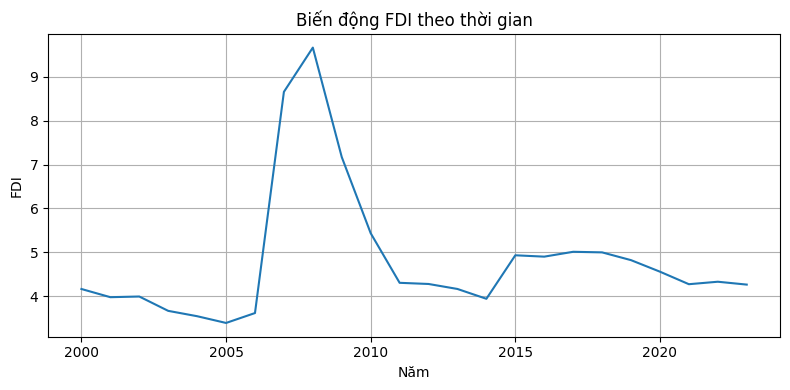

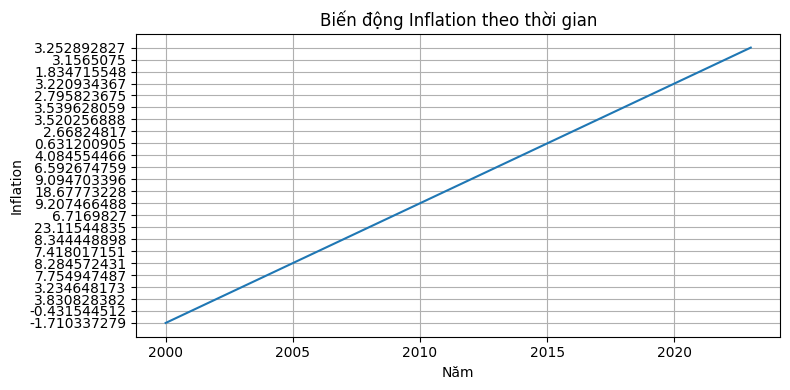

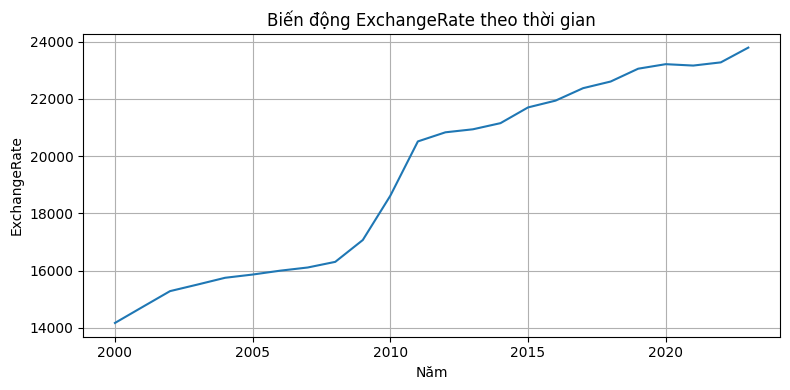

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------
# 0. HIỂN THỊ DANH SÁCH CỘT GỐC
# -----------------------------------------------------
print("===== DANH SÁCH CỘT TRONG DATASET =====")
for col in df.columns:
    print(col)

# -----------------------------------------------------
# 1. ĐỔI TÊN CỘT NẾU TỒN TẠI
# -----------------------------------------------------
rename_map = {
    "Year": "Year",
    "GDP (current US$) [NY.GDP.MKTP.CD]": "GDP",
    "GDP per capita (current US$) [NY.GDP.PCAP.CD]": "GDP_per_capita",
    "Population, total [SP.POP.TOTL]": "Population",
    "Foreign direct investment, net inflows (% of GDP) [BX.KLT.DINV.WD.GD.ZS]": "FDI",
    "Foreign direct investment, net outflows (% of GDP) [BM.KLT.DINV.WD.GD.ZS]": "FDI_out",
    "Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]": "Inflation",
    "Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]": "ExchangeRate",
    "Export": "Export",
    "Import": "Import",
    "TradeBalance": "TradeBalance"
}

df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

# -----------------------------------------------------
# 2. DỮ LIỆU TRƯỚC TIỀN XỬ LÝ
# -----------------------------------------------------
print("\n===== DỮ LIỆU TRƯỚC KHI TIỀN XỬ LÝ =====")
display(df.head())
print("\nKÍCH THƯỚC DỮ LIỆU:", df.shape)

print("\nGIÁ TRỊ THIẾU:")
display(df.isnull().sum())

# -----------------------------------------------------
# 3. THỐNG KÊ MÔ TẢ
# -----------------------------------------------------
print("\n===== THỐNG KÊ MÔ TẢ =====")
display(df.describe())

# -----------------------------------------------------
# 4. XỬ LÝ GIÁ TRỊ THIẾU (BÙ TRUNG BÌNH)
# -----------------------------------------------------
df_processed = df.fillna(df.mean(numeric_only=True))
df_processed = df_processed.rename(
    columns={k: v for k, v in rename_map.items() if k in df_processed.columns}
)
print("\n===== DỮ LIỆU SAU TIỀN XỬ LÝ =====")
display(df_processed.head())

# Xuất file dữ liệu đã xử lý
output_file = "macro_vietnam_processed.csv"
df_processed.to_csv(output_file, index=False, encoding="utf-8-sig")

print(f"✅ Đã xuất file dữ liệu: {output_file}")
# -----------------------------------------------------
# 5. MA TRẬN TƯƠNG QUAN
# -----------------------------------------------------
candidate_vars = [
    "GDP",
    "GDP_per_capita",
    "Population",
    "Export",
    "Import",
    "TradeBalance",
    "FDI",
    "Inflation",
    "ExchangeRate"
]

print("df_processed columns:", df_processed.columns.tolist())

corr_vars = [col for col in candidate_vars if col in df_processed.columns]

print("\nCÁC BIẾN ĐƯỢC DÙNG TRONG MA TRẬN TƯƠNG QUAN:")
print(corr_vars)

corr_matrix = df_processed[corr_vars].corr()
display(corr_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các chỉ tiêu kinh tế vĩ mô")
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# 6. BIẾN ĐỘNG THEO THỜI GIAN (VẼ CÁC BIẾN CÓ SẴN)
# -----------------------------------------------------
for col in corr_vars:
    if col != "Year":
        plt.figure(figsize=(8,4))
        plt.plot(df_processed["Year"], df_processed[col])
        plt.xlabel("Năm")
        plt.ylabel(col)
        plt.title(f"Biến động {col} theo thời gian")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
